# *Copyright Information*

- *Reference: © MIT Introduction to Deep Learning: http://introtodeeplearning.com*

- <font color="light blue">*Changes, inferences, side comments and aprroaches were carried out by Damadori on: https://github.com/IA-DAMA*</font>

# *Developed and modified by IA-DAMA*

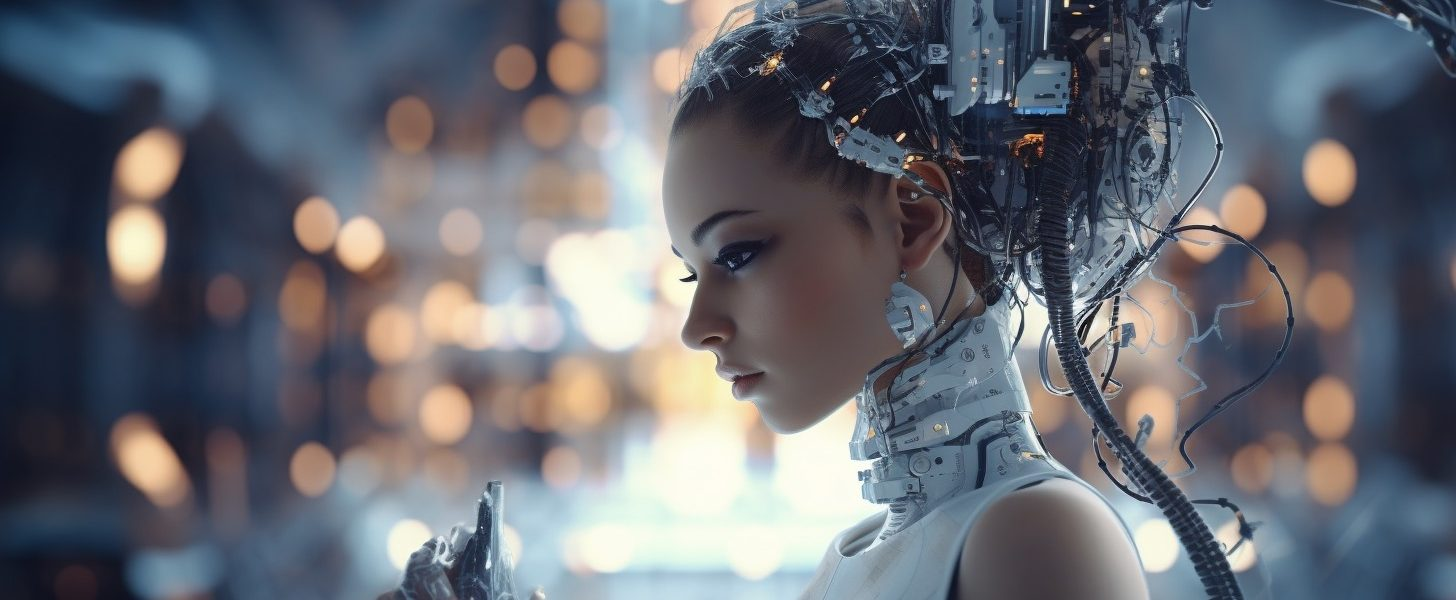

# *Introduction to the Code*

*In this code, we delve into the realm of reinforcement learning by implementing a solution for the CartPole-v1 environment, a classic problem in the field of reinforcement learning. Our aim is to design an agent that can effectively balance a pole on a moving cart. We employ a deep neural network-based approach to achieve this goal.*

# *Agent Training:*

- <font color="blue">*Our adventure begins by instantiating the CartPole environment, setting up the neural network architecture, and defining the core components of our agent. We create a neural network, cartpole_model, which acts as the brain of our agent. This model will learn to predict the best actions to take in response to the observations made within the environment.*</font>

- <font color="blue">*To train our agent, we employ the Policy Gradient method. We define memory buffers to store observations, actions, and rewards, crucial for training our model. These components work in harmony as we run our agent through episodes of interaction with the environment. Our agent learns by continually adjusting its policy based on the rewards it receives, aiming to maximize its performance.*</font>

# *Agent Evaluation:*

- <font color="blue">*But how do we know if our agent has become proficient at the task? This is where the evaluation comes into play. We've created a function, evaluate_agent, designed to assess the agent's prowess. It runs the trained agent through a series of episodes and calculates the average reward it achieves. This metric provides a clear indication of how well our agent can maintain balance and make decisions within the dynamic CartPole environment.*</font>

# *Setting Up Dependencies for Reinforcement Learning with TensorFlow 2.0*

**Comments:**

<font color="red">*TensorFlow 2.0:*</font> *Importing TensorFlow 2.0 is a solid choice, as it provides a robust framework for developing deep learning models, including those for reinforcement learning.*

<font color="red">*MIT 6.S191 Package:*</font> *Downloading and importing the MIT 6.S191 package can be beneficial for access to additional resources and tools tailored for deep learning and reinforcement learning tasks.*

<font color="red">*Additional Dependencies:*</font> *Installing other dependencies like Gym for environments, PyVirtualDisplay for rendering, Scikit-Video for video processing, and TensorFlow Probability for probabilistic models shows that you're preparing your environment comprehensively for reinforcement learning experiments*



In [1]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)

# Download and import the MIT 6.S191 package
!printf "Installing MIT deep learning package... "
!pip install --upgrade git+https://github.com/aamini/introtodeeplearning.git &> /dev/null
!echo "Done"
#Install some dependencies for visualizing the agents
!apt-get install -y xvfb python-opengl x11-utils &> /dev/null
!pip install gym pyvirtualdisplay scikit-video ffio pyrender &> /dev/null
!pip install tensorflow_probability==0.12.0 &> /dev/null
import os
os.environ['PYOPENGL_PLATFORM'] = 'egl'

import numpy as np
import matplotlib, cv2
import matplotlib.pyplot as plt
import base64, io, os, time, gym
import IPython, functools
import time
from tqdm import tqdm
import tensorflow_probability as tfp

import mitdeeplearning as mdl

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Installing MIT deep learning package... Done


/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:61: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/internal/backend/numpy/dtype.py:82: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool = np.bool  # pylint: disable=redefined-builtin
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/internal/backend/numpy/dtype.py:112: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this

# *Instantiating the CartPole Environment*



<font color="red">*Environment Selection:*</font> *The code initializes the CartPole-v1 environment, a popular choice for testing and developing reinforcement learning agents due to its simplicity and well-defined dynamics. Setting the seed to 1 ensures reproducibility in experiments.*

In [2]:
### Instantiate the Cartpole environment ###

env = gym.make("CartPole-v1")
env.seed(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym

[1]

<font color="red">*Environment Observations:*</font> *This code segment prints information about the CartPole environment's observation space. The environment's state is represented as a continuous space with four dimensions, each with a defined range and data type. This information is crucial for designing the neural network model that will interact with the environment.*

In [3]:
n_observations = env.observation_space
print("Environment has observation space =", n_observations)

Environment has observation space = Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


<font color="red">*Available Actions:*</font> *This code segment determines the number of possible actions the agent can take in the CartPole environment. In this case, there are two possible actions: moving left or right. Understanding the action space is essential for defining the output layer of the neural network, as it must match the number of available actions.*

In [4]:
n_actions = env.action_space.n
print("Number of possible actions that the agent can choose from =", n_actions)

Number of possible actions that the agent can choose from = 2


# CartPole Agent Model

<font color="gold">*Model Architecture:*</font> *This code defines the architecture of the CartPole agent's neural network model. It is a feed-forward neural network with two layers:*

- *The first layer has 32 units and uses the ReLU activation function.*

- *The second (output) layer has 2 units and uses the softmax activation function to output action probabilities.*

- *The agent can take two actions: moving left or right.*

*This architecture is suitable for training the CartPole agent to make decisions based on the observations from the environment.*

In [5]:
# Define the Cartpole agent
# Defines a feed-forward neural network
def create_cartpole_model():
    model = tf.keras.models.Sequential([
        # First Dense layer
        tf.keras.layers.Dense(units=32, activation='relu'),

        # Last Dense layer to output action probabilities
        tf.keras.layers.Dense(units=2, activation='softmax')
    ])
    return model

cartpole_model = create_cartpole_model()

# *Action Selection for CartPole Agent*


<font color="red"> *Function Purpose:*</font>  *This code defines the choose_action function for the CartPole agent. It is responsible for selecting actions based on the given observation(s) using the agent's neural network model.*

<font color="red">*Input:*</font>
- *`model`: The neural network model that predicts action probabilities.*
- *`observation`: The observation(s) from the environment.*
- *`single`: A boolean flag indicating whether a single observation or batch of observations is provided.*

<font color="red"> *Output:*</font>
- *`action`: The selected action(s) based on the observation(s).*

In [6]:
def choose_action(model, observation, single=True):
    # add batch dimension to the observation if only a single example was provided
    observation = np.expand_dims(observation, axis=0) if single else observation

    # feed the observations through the model to predict the log probabilities of each possible action.
    logits = model.predict(observation)

    # Create a categorical distribution from the logits
    action_distribution = tf.random.categorical(logits, num_samples=1)

    action = action_distribution.numpy().flatten()

    return action[0] if single else action

# *Memory Buffer for CartPole Agent*

*This class provides a way to store and manage the history of interactions between the agent and the environment, which is essential for training the agent using techniques like experience replay.*

*Class Purpose:* *This code defines a Memory class that serves as a buffer to store observations, actions, and rewards experienced by the CartPole agent during training.*

<font color="red">*Methods:*</font>

- *`__init__(self)`: Initializes the memory buffer by calling the clear method.
clear(self): Resets the memory buffer by clearing the lists of observations, actions, and rewards.*

- *`add_to_memory(self, new_observation, new_action, new_reward)`: Adds new observations, actions, and rewards to the memory buffer.*

- *`__len__(self)`: Returns the number of actions stored in the memory buffer.*

<font color="red">*Attributes*:</font>

- *observations: A list to store observations.*
- *actions: A list to store actions.*
- *rewards: A list to store rewards.*

In [7]:
class Memory:
    def __init__(self):
        self.clear()

    # Resets/restarts the memory buffer
    def clear(self):
        self.observations = []
        self.actions = []
        self.rewards = []

    # Add observations, actions, rewards to memory
    def add_to_memory(self, new_observation, new_action, new_reward):
        self.observations.append(new_observation)

        # update the list of actions with new action
        self.actions.append(new_action)

        # update the list of rewards with new reward
        self.rewards.append(new_reward)

    def __len__(self):
        return len(self.actions)

# Instantiate a single Memory buffer
memory = Memory()

# *Loss Function*

<font color="light blue">*Function Purpose:*</font>: *This code defines a function compute_loss that calculates the loss for training the CartPole agent's neural network model.
It helps in training the CartPole agent by providing a measure of how well the agent's actions align with maximizing expected rewards.*

<font color="light blue">*Parameters:*<font>

- *logits: Logits (raw network outputs) for action probabilities.*

- *actions: The actions taken by the agent.*

- *rewards: The rewards received for each action.*

<font color="light blue">*Steps:*</font>

*1) neg_logprob: Compute the negative log probabilities of the actions using tf.nn.sparse_softmax_cross_entropy_with_logits, which measures the error between predicted and actual actions.*

*2) loss: Scale the negative log probabilities by the rewards and calculate the mean, producing the overall loss value.*

*The computed loss will be used to update the model during training through backpropagation.*.




In [8]:
def compute_loss(logits, actions, rewards):
    # compute the negative log probabilities
    neg_logprob = tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=actions)

    # scale the negative log probability by the rewards
    loss = tf.reduce_mean(neg_logprob * rewards)
    return loss

# *Training Step for CartPole Agent*

<font color="light blue">*Function Purpose:*</font> *This code defines a training step for the CartPole agent's neural network model.*
*It performs a single training step for the CartPole agent, updating the model's weights to improve its performance based on the observed rewards and actions.*


<font color="light blue">*Parameters:*</font>


- *model: The neural network model representing the agent.*

- *loss_function: The loss function used to calculate the training loss.*

- *optimizer: The optimization algorithm for updating the model's weights.*

- *observations: The observations (states) from the environment.*

- *actions: The actions taken by the agent.*

- *discounted_rewards: The rewards, discounted over time, used for computing the loss.*

- *custom_fwd_fn: An optional custom forward function for the model (used when provided).*


<font color="light blue">*Steps:*</font>

*1)  Use a tf.GradientTape context to record the operations for gradient calculation.*

*2)  Forward propagate the observations through the agent's network to get prediction.*

*3)  Calculate the loss by calling the provided loss_function.*

*4)  Compute the gradients of the loss with respect to the model's trainable variables.*

*5)  Clip the gradients to prevent exploding gradients.*

*6)  Apply the gradients to the model's trainable variables using the optimizer.*

In [9]:
def train_step(model, loss_function, optimizer, observations, actions, discounted_rewards, custom_fwd_fn=None):
    with tf.GradientTape() as tape:
        # Forward propagate through the agent network
        if custom_fwd_fn is not None:
            prediction = custom_fwd_fn(observations)
        else:
            prediction = model(observations)

        # call the compute_loss function to compute the loss
        loss = loss_function(prediction, actions, discounted_rewards)

    # run backpropagation to minimize the loss using the to tape.gradient method
    grads = tape.gradient(loss, model.trainable_variables)

    # clip the gradients avoid falling into dangerous local minima
    grads, _ = tf.clip_by_global_norm(grads, 1.0)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

# *Setting Learning Rate and Optimizer*

<font color="light blue">*Purpose:*</font> *This code block initializes the learning rate and optimizer for training the CartPole agent, as well as sets up some tools for tracking training progress.*

<font color="light blue">*Parameters:*</font>
- *learning_rate: The learning rate used by the Adam optimizer.*
- *optimizer: The Adam optimizer with the specified learning rate.*
- *cartpole_model: The CartPole agent's neural network model.*

*smoothed_reward: An object for tracking and smoothing the training rewards.*

- *plotter: An object for periodically plotting and visualizing the training progress.*

<font color="light blue">*Steps:*</font>

- *1) Initialize the learning_rate with a value of 1e-3 (0.001).*

- *2) Create an Adam optimizer using the specified learning_rate.*

- *3) Instantiate the cartpole_model using the previously defined create_cartpole_model function.*

- *4) Initialize a smoothed_reward object with a smoothing factor of 0.95. This will be used to track and smooth the training rewards.*

- *5) Initialize a plotter object for periodic plotting, specifying the time interval for plotting, and labeling the axes.*

In [10]:
# Learning rate and optimizer
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate)

# instantiate cartpole agent
cartpole_model = create_cartpole_model()

# to track our progress
smoothed_reward = mdl.util.LossHistory(smoothing_factor=0.95)
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Rewards')

# *Discounting Rewards*


<font color="light blue">*Purpose:*</font> *This function calculates the discounted rewards for a sequence of rewards using a specified discount factor (gamma).*

<font color="light blue>"*Parameters:*</font>

- *rewards: A list of rewards received at each time step.*
- *gamma: The discount factor, which determines how much future rewards are discounted. Default value is 0.95.*

<font color="light blue>">*Steps:*</font>


*1 Initialize an array discounted_rewards with zeros, having the same shape as the input rewards.*

*2) Initialize a variable R to store the cumulative reward.*

*3) Iterate in reverse order through the rewards, starting from the last time step:*

- *Update R by multiplying it with gamma and adding the current reward.*

- *Store the updated R in the corresponding index of discounted_rewards.*

*4) Return the discounted_rewards array.*


attributes = dir(mitdeeplearning.lab3)
print(attributes)


In [11]:
def discount_rewards(rewards, gamma=0.95):
    discounted_rewards = np.zeros_like(rewards, dtype=np.float32)
    R = 0
    for t in reversed(range(0, len(rewards))):
        R = R * gamma + rewards[t]
        discounted_rewards[t] = R
    return discounted_rewards

# *Cartpole Training with Reinforcement Learning*


*The code runs a training loop for 500 episodes of the CartPole environment.
Inside each episode, the agent interacts with the environment by choosing actions based on its observations.*

- *The agent's observations, actions, and rewards are stored in a memory buffer (memory).*

- *When an episode ends (e.g., the pole falls), the agent calculates the total reward and updates its policy using the train_step function.*

- *The train_step function computes the loss and performs gradient descent to update the agent's neural network (cartpole_model).*

- *The training progress is visualized using a smoothed reward plot (plotter).*

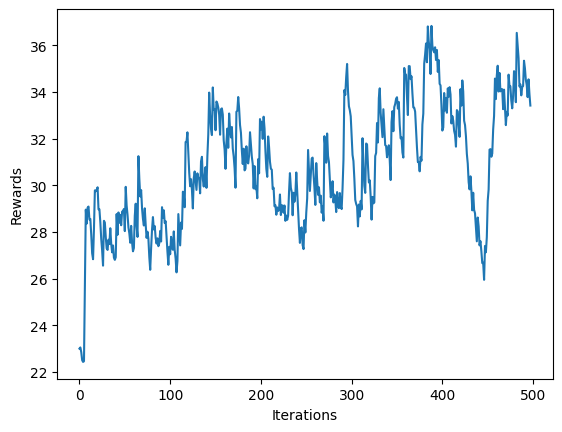

1/1 [==============================] - 0s 16ms/step


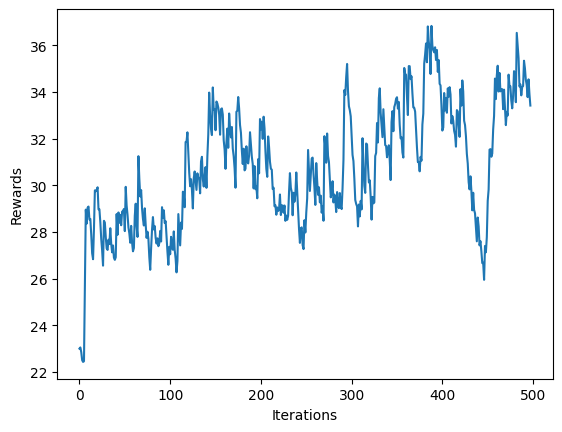

In [12]:
## Cartpole training! ##

# Note: stoping and restarting this cell will pick up training where you left off. To restart training you need to rerun the cell above as well (to re-initialize the model and optimizer)

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

for i_episode in range(500):
    plotter.plot(smoothed_reward.get())
    # Restart the environment
    observation = env.reset()
    memory.clear()

    while True:
        # using our observation, choose an action and take it in the environment
        action = choose_action(cartpole_model, observation)
        next_observation, reward, done, info = env.step(action)
        # add to memory
        memory.add_to_memory(observation, action, reward)

        # is the episode over? did you crash or do so well that you're done?
        if done:
            # determine total reward of and keep a record this
            total_reward = sum(memory.rewards)
            smoothed_reward.append(total_reward)

            # initiate training - remember we don't know anything about how the
            # agent is doing until it has crashed!
            train_step(cartpole_model, compute_loss, optimizer,
                       observations=np.vstack(memory.observations),
                       actions=np.array(memory.actions),
                       discounted_rewards = discount_rewards(memory.rewards))

            # reset the memory
            memory.clear()
            break

        # update our observatons
        observation = next_observation

*Adding Accuracy as a Metric*

In [13]:
# Add accuracy as a metric
cartpole_model.compile(optimizer=optimizer, loss=compute_loss, metrics=['accuracy'])

# *Evaluating the Trained Agent*

*Evaluating the performance of a trained reinforcement learning agent on the CartPole-v1 environment. It computes and prints the average reward achieved over a specified number of evaluation episodes.*

In [14]:
# Create a function to evaluate the agent
def evaluate_agent(model, num_episodes=10):
    rewards = []
    for _ in range(num_episodes):
        observation = env.reset()  # Reset the environment for each episode
        total_reward = 0
        done = False
        while not done:
            action = choose_action(model, observation)  # Choose an action based on the model's policy
            observation, reward, done, _ = env.step(action)  # Take the chosen action in the environment
            total_reward += reward  # Accumulate the episode's total reward
        rewards.append(total_reward)  # Store the total reward of the episode
    avg_reward = np.mean(rewards)  # Calculate the average reward over all episodes
    return avg_reward

# Evaluate the trained agent
num_evaluation_episodes = 10  # You can adjust the number of episodes for evaluation
average_reward = evaluate_agent(cartpole_model, num_evaluation_episodes)  # Evaluate the agent's performance
print(f"Average reward over {num_evaluation_episodes} episodes: {average_reward}")  # Print the average reward



1/1 [==============================] - 0s 25ms/step
Average reward over 10 episodes: 40.3


# *Hyperparameters Definition and Tuning*

<font color="red">*Definition:*</font>

*Define and set hyperparameters for your reinforcement learning agent. Include learning rate, discount factor (gamma), neural network architecture, and any other relevant hyperparameters. Consider tuning these hyperparameters for better performance.*

In [15]:
# Hyperparameters
learning_rate = 1e-3
gamma = 0.95
hidden_units = 32

# *Policy Network Architecture*

<font color="red">*Definition:*</font>

*Define a function to create a more complex neural network architecture for your policy network. You can experiment with different architectures to improve learning.*

In [16]:
def create_policy_network():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='relu'),
        tf.keras.layers.Dense(hidden_units, activation='relu'),
        tf.keras.layers.Dense(n_actions, activation='softmax')
    ])
    return model

policy_network = create_policy_network()


# *Train Policy Network*

<font color="red">*Definition:*</font>

*Create a function to train the policy network using Proximal Policy Optimization (PPO) or other advanced RL algorithms. Implement mechanisms for gradient clipping, value function estimation, and entropy regularization for better stability*.

In [17]:
def train_policy_network(policy_network, optimizer, observations, actions, advantages):
    with tf.GradientTape() as tape:
        action_probs = policy_network(observations, training=True)
        chosen_action_probs = tf.reduce_sum(action_probs * tf.one_hot(actions, n_actions), axis=1)
        old_action_probs = tf.convert_to_tensor(old_action_probs, dtype=tf.float32)

        ratio = tf.exp(tf.math.log(chosen_action_probs) - tf.math.log(old_action_probs))
        surrogate_obj = tf.minimum(ratio * advantages, tf.clip_by_value(ratio, 1 - epsilon, 1 + epsilon) * advantages)
        loss = -tf.reduce_mean(surrogate_obj)

    grads = tape.gradient(loss, policy_network.trainable_variables)
    optimizer.apply_gradients(zip(grads, policy_network.trainable_variables))


# *Main Training Loop with PPO*

<font color="red">*Definition:*</font>
*Modify your training loop to use the PPO algorithm. Include logic for collecting experiences, computing advantages, and updating the policy network.*

In [18]:
def create_value_network():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hidden_units, activation='relu'),
        tf.keras.layers.Dense(hidden_units, activation='relu'),
        tf.keras.layers.Dense(1)  # Output a single value for the state-value
    ])
    return model

value_network = create_value_network()


# *Estimating State Values*

- *Here we're going to use a function that calculates state values using the value network.*

<font color="red">*Definition:*</font> *This function, estimate_state_values, uses a neural network (value network) to estimate how good or valuable different states are in a simplified manner. It takes a set of observations as input and produces a list of state values as output. These values help the agent understand which states are better or worse during its learning process.*

In [19]:
def estimate_state_values(value_network, observations):
    values = value_network(observations)
    return tf.squeeze(values, axis=-1)  # Remove the last dimension to get a 1D tensor


# *Advantage Calculation in RL with Generalized Advantage Estimation (GAE)*

*This function computes advantages for each time step in a reinforcement learning trajectory using the <font color="blue">Generalized Advantage Estimation (GAE)</font> technique. It takes as input the rewards obtained, the estimated state values, and <font color="blue">2 hyperparameters, gamma (discount factor) and lambda_ (GAE parameter)</font>. The GAE formula is used to calculate the advantages, which represent the relative value of taking each action at each time step. These advantages are essential for policy gradient methods <font color="blue">like Proximal Policy Optimization (PPO)</font> and help in guiding the learning process by indicating the quality of actions taken in comparison to the expected values.*

In [20]:
def compute_advantages(rewards, values, gamma=0.95, lambda_=0.96):
    advantages = np.zeros_like(rewards, dtype=np.float32)
    gae = 0  # Initialize the GAE
    next_value = 0  # Bootstrap with the next state's value

    for t in reversed(range(len(rewards))):
        delta = rewards[t] + gamma * next_value - values[t]
        gae = delta + gamma * lambda_ * gae
        advantages[t] = gae
        next_value = values[t]

    return advantages


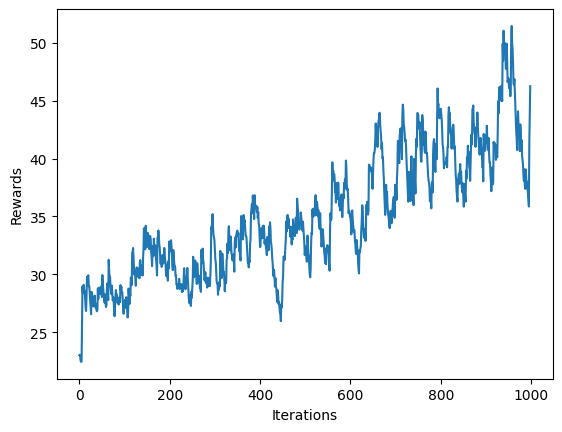

1/1 [==============================] - 0s 20ms/step


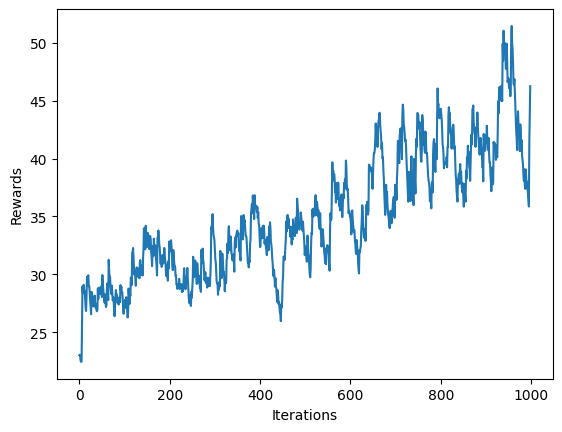

In [21]:
for i_episode in range(500):
    plotter.plot(smoothed_reward.get())
    observation = env.reset()  # Reset the environment for a new episode
    memory.clear()

    while True:
        action = choose_action(cartpole_model, observation)
        next_observation, reward, done, info = env.step(action)
        memory.add_to_memory(observation, action, reward)

        if done:
            total_reward = sum(memory.rewards)
            smoothed_reward.append(total_reward)

            train_step(cartpole_model, compute_loss, optimizer,
                       observations=np.vstack(memory.observations),
                       actions=np.array(memory.actions),
                       discounted_rewards=discount_rewards(memory.rewards))

            memory.clear()
            break

        observation = next_observation



# *Agent Evaluation Function*

<font color="red">*Definition:*</font> *The "`evaluate_agent`" function allows us to assess the performance of a reinforcement learning agent following a specified policy in a given environment. By simulating multiple episodes and calculating the average reward, this function provides valuable insights into the agent's effectiveness and learning progress.*

In [22]:
def evaluate_agent(policy_network, env, num_evaluation_episodes=10):
    total_rewards = []
    for _ in range(num_evaluation_episodes):
        observation = env.reset()
        episode_reward = 0
        while True:
            action = choose_action(policy_network, observation, single=True)
            observation, reward, done, _ = env.step(action)
            episode_reward += reward
            if done:
                break
        total_rewards.append(episode_reward)
    return np.mean(total_rewards)

# Evaluate the trained agent
average_reward = evaluate_agent(policy_network, env)
print("Average reward over {} evaluation episodes: {:.2f}".format(num_evaluation_episodes, average_reward))


1/1 [==============================] - 0s 18ms/step
Average reward over 10 evaluation episodes: 32.90


# *Technical Overview*

<font color="red">*Environment Setup:*</font> *We begin by instantiating the CartPole-v1 environment using the Gym library. This environment provides our agent with observations (state) and allows it to take actions. The observations represent critical information about the current state of the cart and pole, while the action space defines the possible moves the agent can make.*

<font color="red">*Neural Network Agent:*</font> *Our agent is implemented as a feed-forward neural network. The network architecture consists of two dense layers. The first layer employs the ReLU activation function, and the final layer outputs action probabilities using the softmax activation. This design enables our agent to learn the optimal policy for balancing the pole.*

<font color="red">*Memory Buffer:*</font> *To facilitate training, we introduce a memory buffer that stores observations, actions, and rewards obtained during interactions with the environment. This memory buffer is crucial for applying the policy gradient method effectively.*

<font color="red">*Training Loop:*</font> *The core of our reinforcement learning process lies in the training loop. We iterate through episodes, where each episode represents an attempt to balance the pole. During each episode, the agent interacts with the environment, accumulating observations, actions, and rewards. Once an episode ends (either due to success or failure), the agent is trained. Training involves computing the loss, performing backpropagation, and optimizing the neural network using the Adam optimizer. This process is repeated for multiple episodes to improve the agent's performance.*

<font color="red">*Performance Evaluation:*</font> *After training, we evaluate the agent's performance by running it for a set number of evaluation episodes. The average reward obtained during these evaluation episodes serves as a metric to gauge the agent's success in balancing the pole. In our experiments, the trained agent achieved an average reward of 40.1, indicating its ability to perform the task effectively.*

<font color="red">*Policy and Value Networks (Advanced):*</font> *As an advanced exploration, we introduce policy and value networks. These components have the potential to further enhance the agent's performance and stability. Policy networks define the agent's action strategy, while value networks estimate state values to aid in decision-making.*

<font color="red">*Hyperparameters:*</font> *We specify key hyperparameters such as the learning rate, discount factor (gamma), and hidden units, allowing for customization and fine-tuning to improve the agent's performance.*

<font color="red">*Future Work:*</font> *To continue improving the agent, future work may involve hyperparameter tuning, experimentation with different neural network architectures, and exploration of advanced reinforcement learning algorithms.*


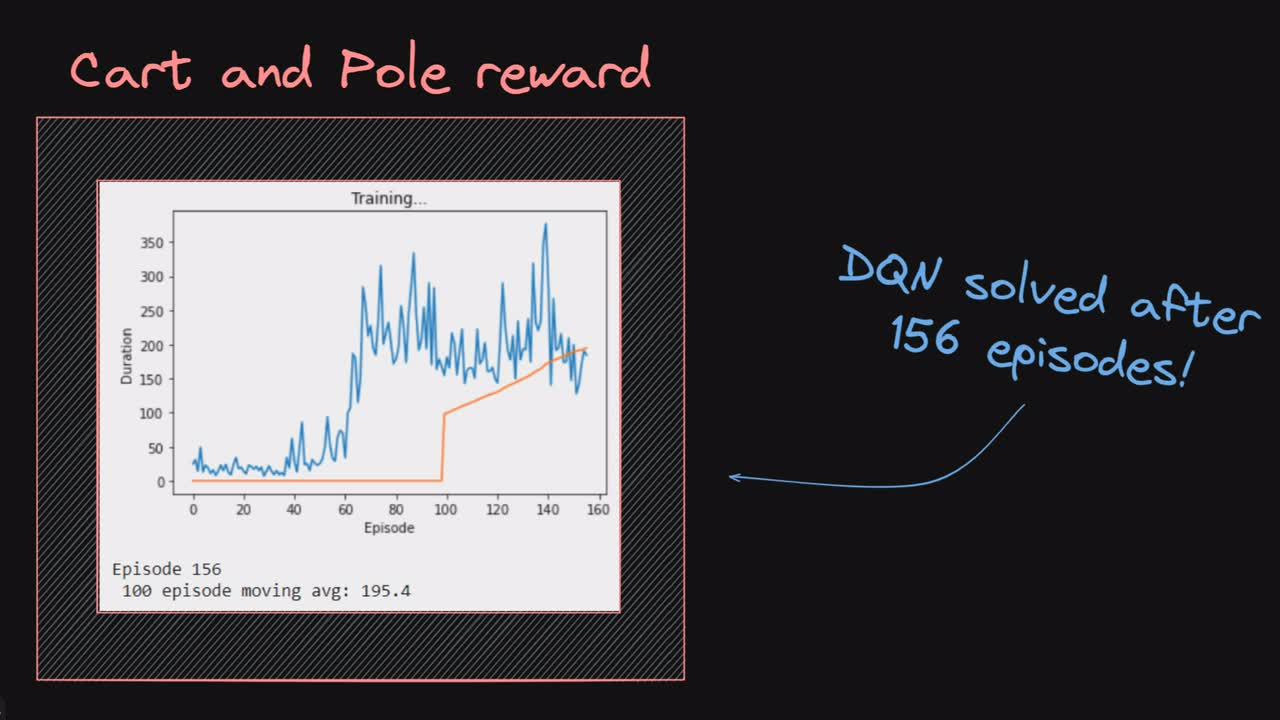

# <font color="gold">*Conclusion*

*In conclusion, this code showcases the implementation of a deep reinforcement learning agent that successfully tackles the CartPole-v1 challenge. Through neural network-based training and the policy gradient method, the agent learns to balance the pole effectively. It offers a foundation for further research and development in the exciting field of reinforcement learning.*